<a href="https://colab.research.google.com/github/ShambhaviSharma0110/Auto-essay-grader/blob/main/DeepLearningClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DEEP LEARNING CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('features.csv')

In [3]:
X=data.iloc[:,3:]
y=data.iloc[:,2]

In [4]:
X.shape

(1805, 13)

In [5]:
X_train, X_test , y_train, y_test = train_test_split(X ,y, test_size=0.18 , random_state=0)

In [6]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [7]:
clf = Sequential()

In [8]:
clf.add(Dense(10,kernel_initializer ='uniform',activation ='tanh', input_dim = 13))
clf.add(Dense(8, kernel_initializer ='uniform',activation ='relu'))
clf.add(Dense(8, kernel_initializer='uniform',activation ='relu'))
clf.add(Dense(5, kernel_initializer ='uniform',activation ='softmax'))

In [9]:
clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
clf.fit(X_train,y_train,batch_size=7,epochs=120)

Epoch 1/120
212/212 [==============================] - 1s 2ms/step - loss: 1.4840 - accuracy: 0.3568
Epoch 2/120
212/212 [==============================] - 0s 2ms/step - loss: 1.2706 - accuracy: 0.4541
Epoch 3/120
212/212 [==============================] - 0s 2ms/step - loss: 1.0312 - accuracy: 0.5541
Epoch 4/120
212/212 [==============================] - 0s 2ms/step - loss: 0.9590 - accuracy: 0.5662
Epoch 5/120
212/212 [==============================] - 0s 2ms/step - loss: 0.9224 - accuracy: 0.5791
Epoch 6/120
212/212 [==============================] - 0s 2ms/step - loss: 0.8847 - accuracy: 0.5953
Epoch 7/120
212/212 [==============================] - 0s 2ms/step - loss: 0.8594 - accuracy: 0.6385
Epoch 8/120
212/212 [==============================] - 0s 2ms/step - loss: 0.8664 - accuracy: 0.6162
Epoch 9/120
212/212 [==============================] - 0s 2ms/step - loss: 0.8578 - accuracy: 0.6284
Epoch 10/120
212/212 [==============================] - 0s 2ms/step - loss: 0.8369 - accura

In [11]:
y_prediction = clf.predict(X_test)

11/11 [==============================] - 0s 1ms/step


In [12]:
y_prediction

array([[1.3037382e-03, 1.0925069e-01, 7.7335119e-01, 1.1609061e-01,
        3.6645683e-06],
       [7.9435399e-03, 3.3927247e-01, 6.3159734e-01, 2.1186581e-02,
        1.6695687e-08],
       [4.2092759e-04, 3.5146993e-02, 4.6921718e-01, 4.9000356e-01,
        5.2113216e-03],
       ...,
       [2.2913206e-04, 2.4053702e-02, 5.0588405e-01, 4.6755454e-01,
        2.2785764e-03],
       [4.3697419e-04, 4.0953055e-02, 6.2284595e-01, 3.3538789e-01,
        3.7612097e-04],
       [1.0404068e-09, 5.1863943e-03, 2.1316914e-02, 3.6346760e-01,
        6.1002910e-01]], dtype=float32)

In [13]:
y_pred = np.argmax(y_prediction, axis=1)

In [14]:
y_pred.shape

(325,)

In [15]:
cm = confusion_matrix(y_test,y_pred)

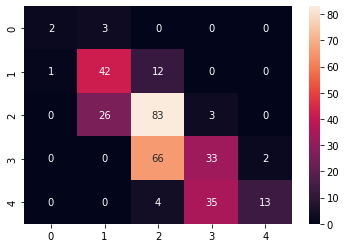

In [16]:
sns.heatmap(cm, annot=True)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5323076923076923